<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/Intro_UnsupervisedLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Unsupervised Learning Algorithms





In [8]:
# Import initial libraries
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  


In [2]:
# Read the penguins dataset

filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv"

df_dist = pd.read_csv(filename)

df_dist.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Drop rows with missing numbers
df = df_dist.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


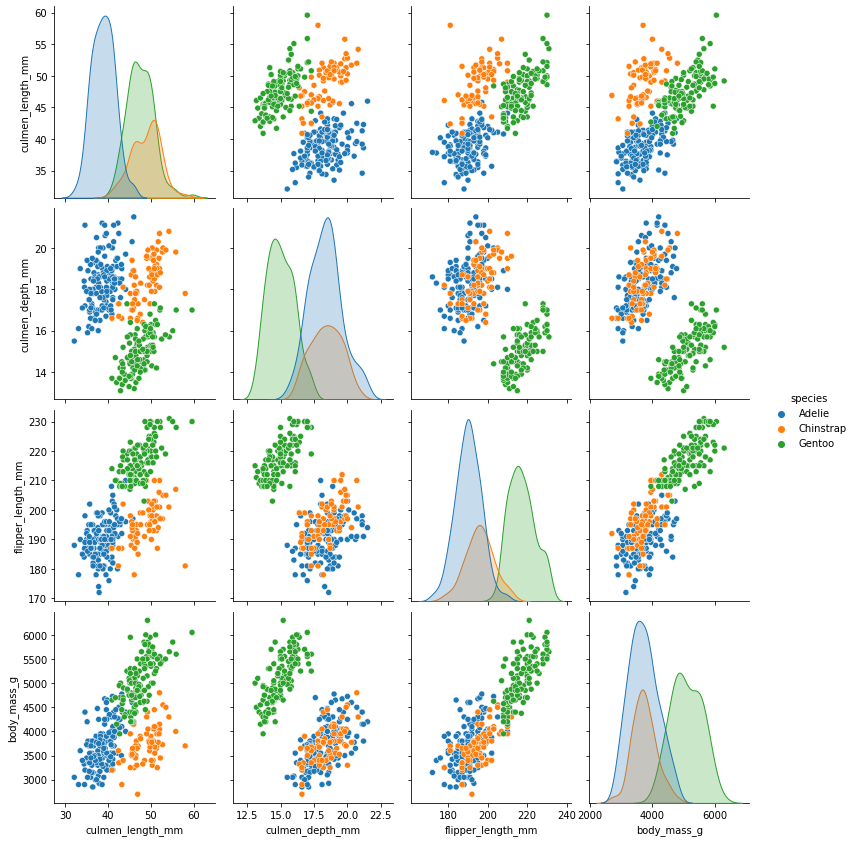

In [ ]:
# See a pair plot for different variables
pairplot_figure = sns.pairplot(df, hue="species")
pairplot_figure.fig.set_size_inches(12, 12)


### Correlation Matrix

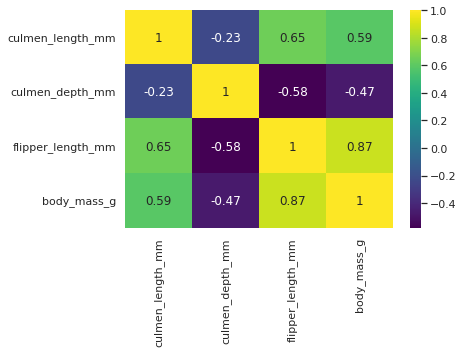

In [7]:
# Correlation map
sns.heatmap(df.corr(), cmap="viridis", annot=True)
plt.show()


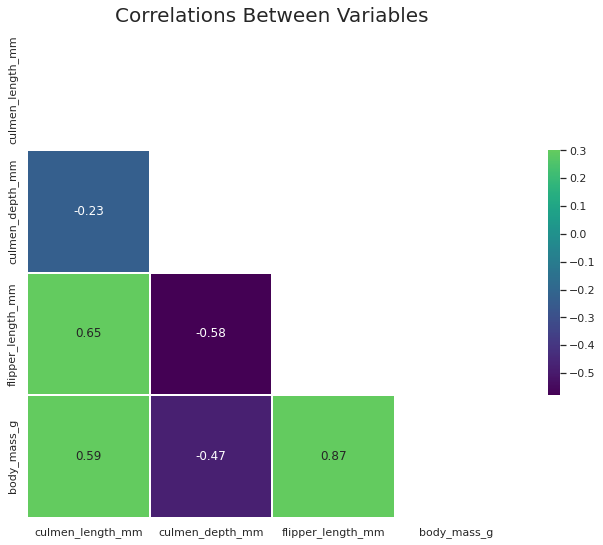

In [13]:
# Print the lower triangular part of correlation matrix

sns.set_theme(style="white")

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="viridis",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Variables", size=20)
plt.show();

In the above matrix, we see that there is an important correlation between **body mass**, **culmen length** and **flipper length**. A similar observation is found between **flipper length** and **culmen length**.   

## Correlation, Multicolinearity and Variance Inflation Factor.

In statistics, [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) (also collinearity) is a phenomenon in which one predictor variable in a [multiple regression model](https://en.wikipedia.org/wiki/Multiple_regression) can be linearly predicted from the others with a substantial degree of accuracy. ([Read more...](https://en.wikipedia.org/wiki/Multicollinearity))

In statistics, the [variance inflation factor (VIF)](https://en.wikipedia.org/wiki/Variance_inflation_factor) is the ratio (quotient) of the variance of estimating some parameter in a model that includes multiple other terms (parameters) by the variance of a model constructed using only one term. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis.

### Computing VIF


In [14]:
# Compute the Correlation Coefficient Matrix and compute Inverse
df_meas = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
cc = sp.corrcoef(df_meas, rowvar=False)
VIF = np.linalg.inv(cc)

# The diagonal of the Variance Inflation Matrix will show VIF
VIF.diagonal()


array([1.8490913 , 1.6040501 , 5.94428413, 4.24368413])

In [12]:

corr = df.corr()
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.849091,-0.408885,-1.357725,-0.097054
culmen_depth_mm,-0.408885,1.604050,1.356334,-0.184811
flipper_length_mm,-1.357725,1.356334,5.944284,-3.749296
body_mass_g,-0.097054,-0.184811,-3.749296,4.243684


Rules from VIF:

*   A VIF of 1 would indicate complete independence from any other variable.
* A VIF between 5 and 10 indicates a very high level of collinearity.
* The closer we get to 1, the more ideal the scenario for predictive modeling.

* Each independent variable regresses against each independent variable, and we calculate the VIF.

### Principal Component Analysis

The principal components of a collection of points in a real coordinate space are a sequence of 
_p unit vectors_, where the 
_i-th_ vector is the direction of a line that best fits the data while being orthogonal to the first 
_i-1_ vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. 

These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest. ([Read more...](https://en.wikipedia.org/wiki/Principal_component_analysis))

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(df_meas)

pca = PCA()
principalComponents = pca.fit_transform(x)
principalComponents = pd.DataFrame(principalComponents)
print('principalComponents Shape', principalComponents.shape)

# Print first 5 rows
principalComponents.head()


PrincipalComponents Shape (334, 4)


,0,1,2,3
0,-1.858488,0.031676,-0.234510,0.528668
1,-1.320722,-0.443473,-0.025823,0.402273
2,-1.381688,-0.161086,0.189986,-0.528493
3,-1.890897,-0.014556,-0.629799,-0.472072
4,-1.925839,0.816179,-0.703351,-0.196043


In [93]:
# Look at the eigenvalues for the Covariance Matrix

print("The eigenvalues for the Covariance Matrix are:", 
      list(np.round(pca.explained_variance_, decimals=3)), end='\n \n')

The eigenvalues for the Covariance Matrix are: [2.754, 0.78]
 


In [95]:
# See how much influence each variable has

#pca.explained_variance_ratio
print('% Explained variance ratio:\n', np.round(100.0*pca.explained_variance_ratio_, decimals=2))

% Explained variance ratio:
 [68.64 19.45]


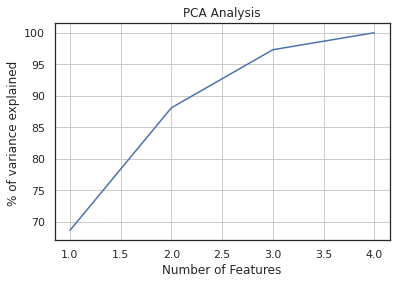

In [32]:
# Variance explained by each PCA component
n_pca = list(range(1,5))
out_sum = np.cumsum(pca.explained_variance_ratio_)*100.0 

plt.plot(n_pca, out_sum)
plt.title('PCA Analysis')
plt.xlabel('Number of Features')
plt.ylabel('% of variance explained ')
plt.grid(True)
plt.show();


In [38]:
pc_df = pd.DataFrame(abs(pca.components_[:2]), columns = df_meas.columns,
                     index = ['Principal Component 1', 'Principal Component 2'])
pc_df 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
Principal Component 1,0.453302,0.399539,0.576782,0.549735
Principal Component 2,0.602018,0.794851,0.005121,0.075898


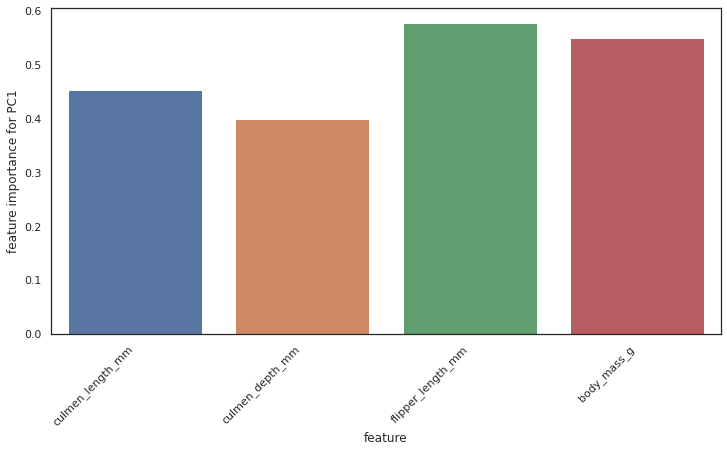

In [70]:
# Plot feature importance for PC1

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=pc_df.columns.values, y=pc_df.iloc[0].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('feature')
ax.set_ylabel('feature importance for PC1')
plt.show();


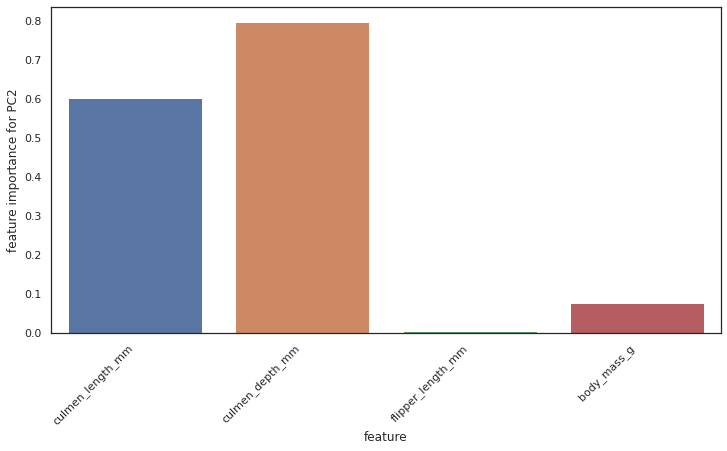

In [71]:
# Plot feature importance for PC2

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=pc_df.columns.values, y=pc_df.iloc[1].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('feature')
ax.set_ylabel('feature importance for PC2')
plt.show();


In [44]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Principal Component 1 to Principal Component 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   2 non-null      float64
 1   culmen_depth_mm    2 non-null      float64
 2   flipper_length_mm  2 non-null      float64
 3   body_mass_g        2 non-null      float64
dtypes: float64(4)
memory usage: 188.0+ bytes


In [82]:
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(principalComponents) # project the original data into the PCA space
X_new.shape

(334, 2)

In [72]:
# Separate dimensions and species
size_columns = ["flipper_length_mm", "culmen_depth_mm"]
target_column = "species"

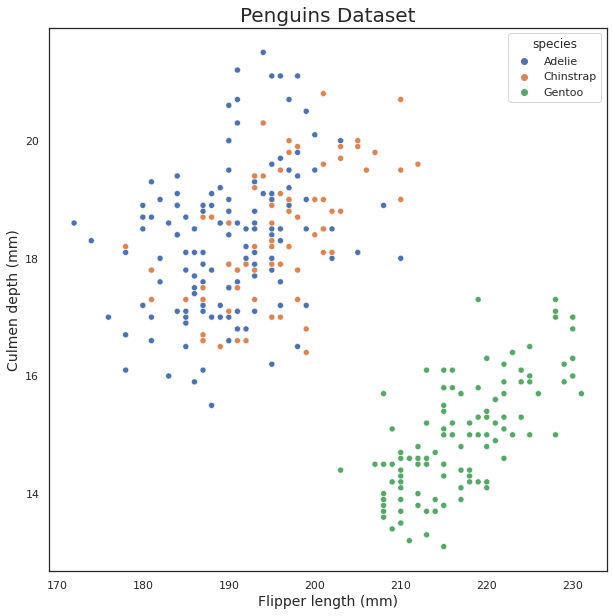

In [78]:
# Draw a scatterplot (Original dataframe)

plt.figure(figsize=(10,10))

x = df['flipper_length_mm'].values
y = df['culmen_depth_mm'].values
color = df['species']

sns.scatterplot(x,y,hue=color)
plt.title('Penguins Dataset',fontsize=20)
plt.xlabel('Flipper length (mm)',fontsize=14)
plt.ylabel('Culmen depth (mm)',fontsize=14)
plt.show()


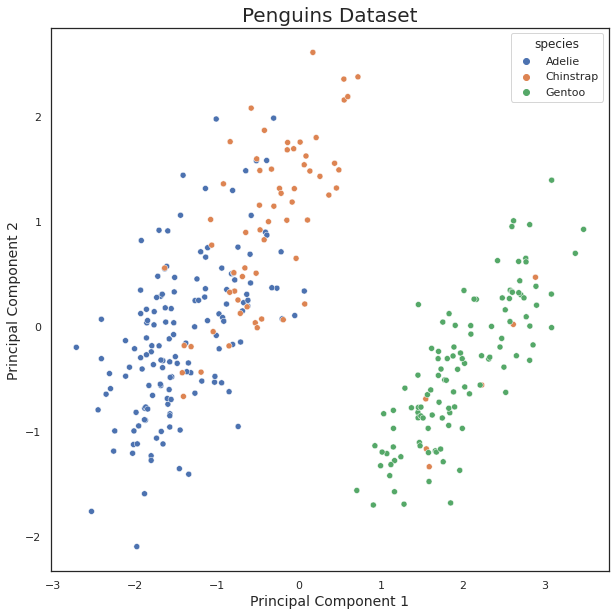

In [91]:
# Draw a scatterplot (In new PCA Coordinates)

plt.figure(figsize=(10,10))

x = principalComponents[0]
y = principalComponents[1]
color = df['species']

sns.scatterplot(x,y,hue=color)
plt.title('Penguins Dataset',fontsize=20)
plt.xlabel('Principal Component 1',fontsize=14)
plt.ylabel('Principal Component 2',fontsize=14)
plt.show()


We can recall that 68.64% of the variance is explained by PC1 and 19.45% by PC2.


In [89]:
principalComponents[0]

0     -1.858488
1     -1.320722
2     -1.381688
3     -1.890897
4     -1.925839
         ...   
329    1.994815
330    1.829451
331    2.748113
332    1.710600
333    2.015030
Name: 0, Length: 334, dtype: float64

### K-Means Algorithm

The [K-Means Algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-means) clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters $k$ to be specified. 

The K-means algorithm aims to choose centroids $\mu_j$ of a cluster $C$ that minimize the inertia, or within-cluster sum-of-squares criterion:

$$
\sum_{i=0}^{n} \min_{\mu_j \in C} ||x_i - \mu_j||^{2}
$$

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

#### Apply K-Means to Penguins dataset

We begin assuming that $k=3$ is a good number of clusters (Since we have 3 identified species).

Will use only 3 properties: culmen length and width and flipper length. 

In [96]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=42)
k_means.fit(df[['culmen_depth_mm', 'flipper_length_mm' ]])


KMeans(n_clusters=3, random_state=42)

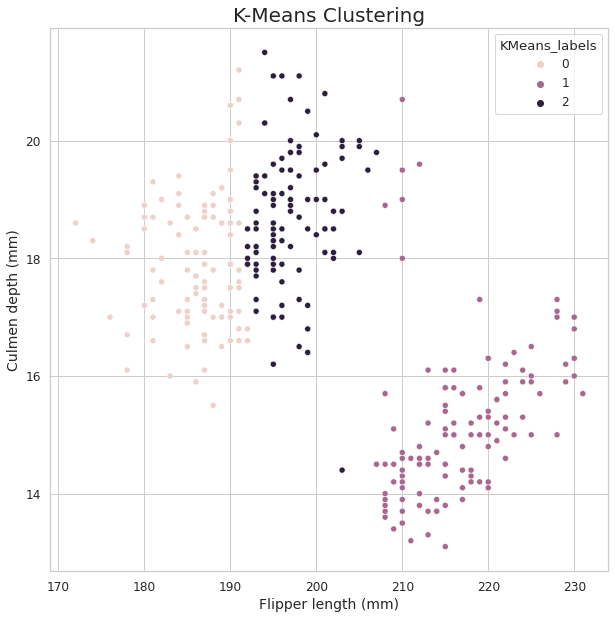

In [102]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
#colors=['purple','red','blue','green']

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10,10]})
sns.scatterplot(df['flipper_length_mm'], df['culmen_depth_mm'], hue=df['KMeans_labels'])
plt.title('K-Means Clustering',fontsize=20)
plt.ylabel('Culmen depth (mm)',fontsize=14)
plt.xlabel('Flipper length (mm)',fontsize=14)
plt.show()


Let's try different assumptions about the number of clusters needed. 

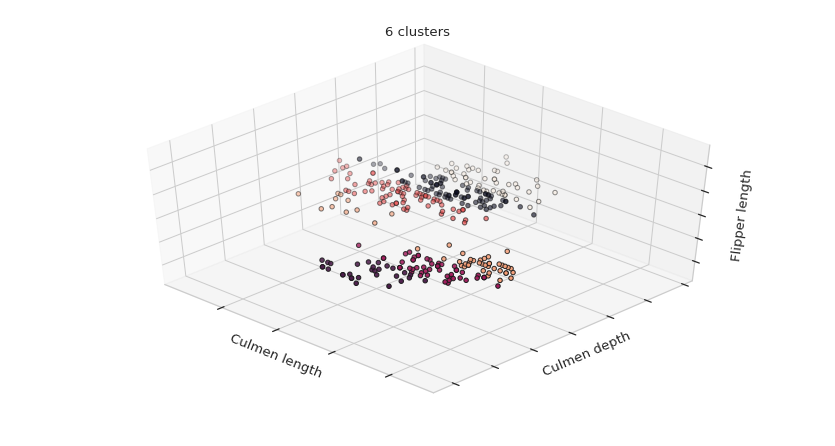

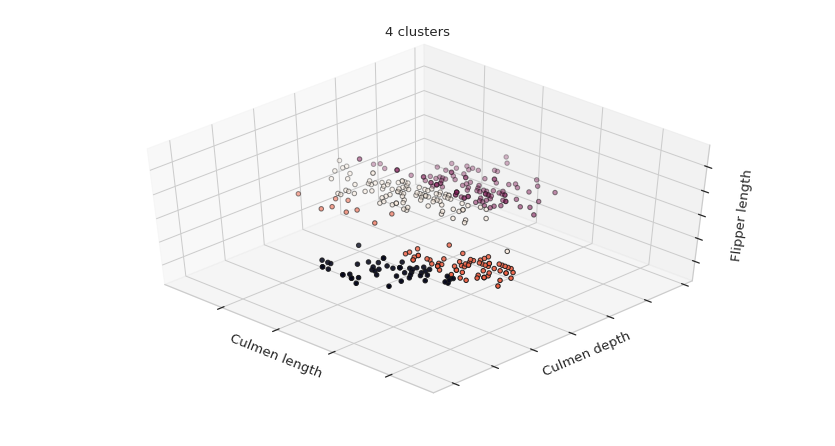

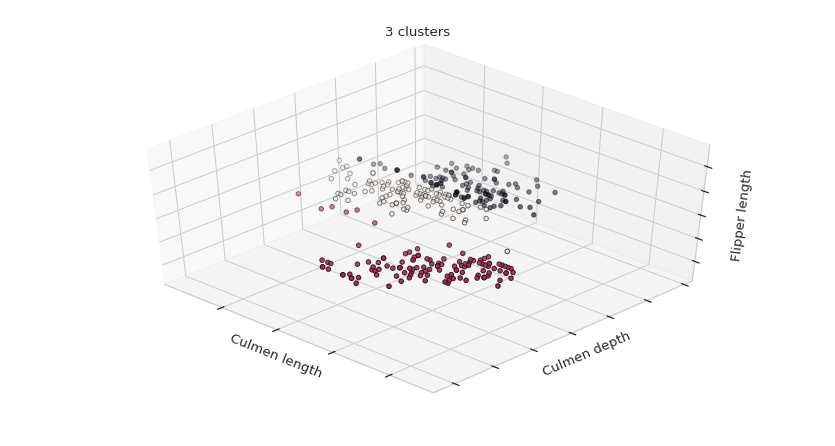

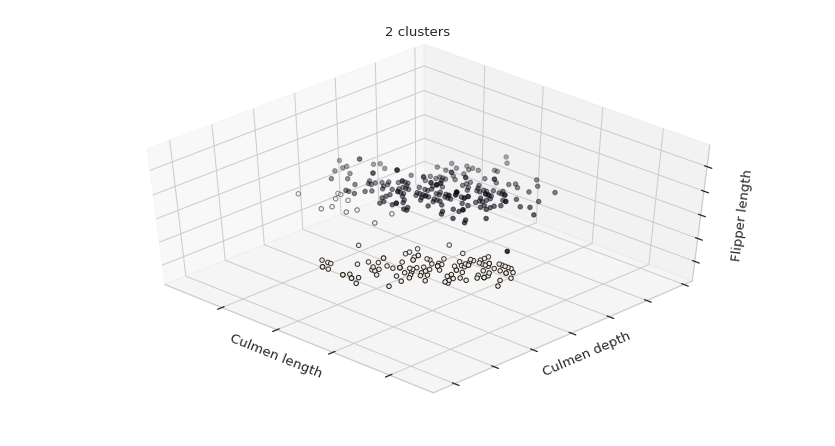

In [103]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.cluster import KMeans
#from sklearn import datasets

#np.random.seed(5)


#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["culmen_depth_mm", "flipper_length_mm"]].values
y = df['species'].values

estimators = [
    ("k_means_5", KMeans(n_clusters=6)),
    ("k_means_4", KMeans(n_clusters=4)),
    ("k_means_3", KMeans(n_clusters=3)),
    ("k_means_2", KMeans(n_clusters=2))
]

fignum = 1
titles = ["6 clusters", "4 clusters", "3 clusters", "2 clusters"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 6))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    #ax.scatter(X[:, 0], X[:, 1], X[:, 2],  c=labels.astype(float), edgecolor="k")
    ax.scatter(X[:, 0], X[:, 1],  c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Culmen length")
    ax.set_ylabel("Culmen depth")
    ax.set_zlabel("Flipper length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


fig.show()


### How to choose k?

The number of clusters (k) is the most important hyperparameter in K-Means clustering. If we already know beforehand, the number of clusters to group the data into, then there is no use to tune the value of k. 

If there is no idea about the optimal value of k, then there are various methods to find the optimal/best value of k. 

These are 2 of the methods:

    Elbow Method
    Silhouette Method

#### Elbow Method:

The _Elbow Method_ is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k. 

Find the average distance of each point in a cluster to its centroid, and represent it in a plot. Pick the value of k, where the average distance falls suddenly.

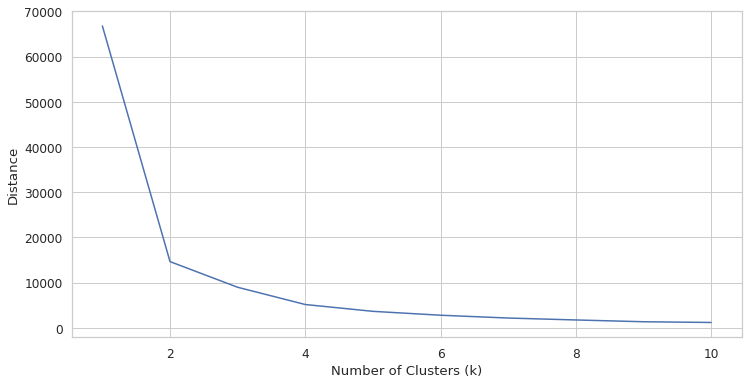

In [142]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style

range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
avg_distance=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
  avg_distance.append(clusterer.inertia_)

#style.use("fivethirtyeight")
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()


With an increase in the number of clusters (k), the average distance decreases. To find the optimal number of clusters (k), observe the plot and find the value of k for which there is a sharp and steep fall of the distance. This is will be an optimal point of k where an elbow occurs.

This data is 2-D, so it's easy to visualize and pick the best value of k, which is k=4. For higher-dimensional data, we can employ the Silhouette Method to find the best k, which is a better alternative to Elbow Method.

#### Silhouette Method:


Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2 The average silhouette_score is : 0.6794155906336113
For n_clusters = 3 The average silhouette_score is : 0.5470803791751535
For n_clusters = 4 The average silhouette_score is : 0.5228848228297953
For n_clusters = 5 The average silhouette_score is : 0.5064964925935984
For n_clusters = 6 The average silhouette_score is : 0.48727296791000935


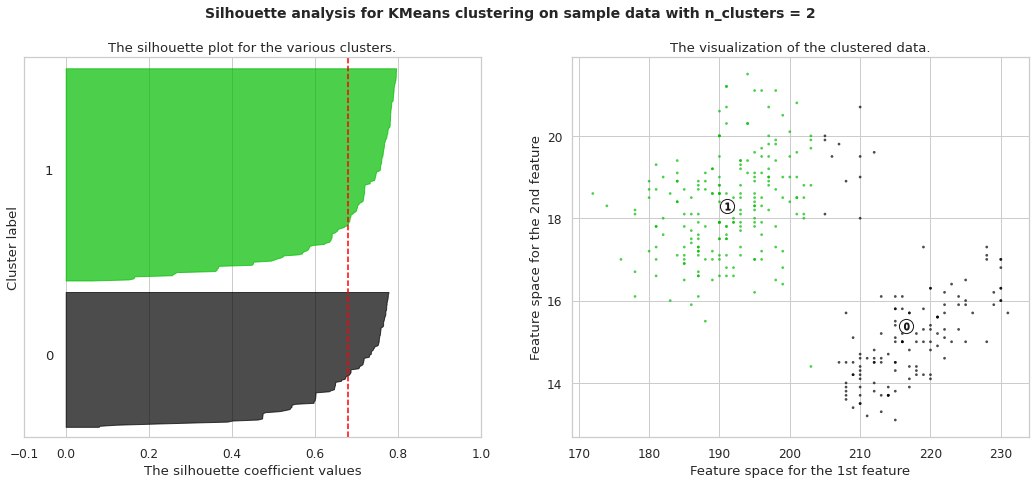

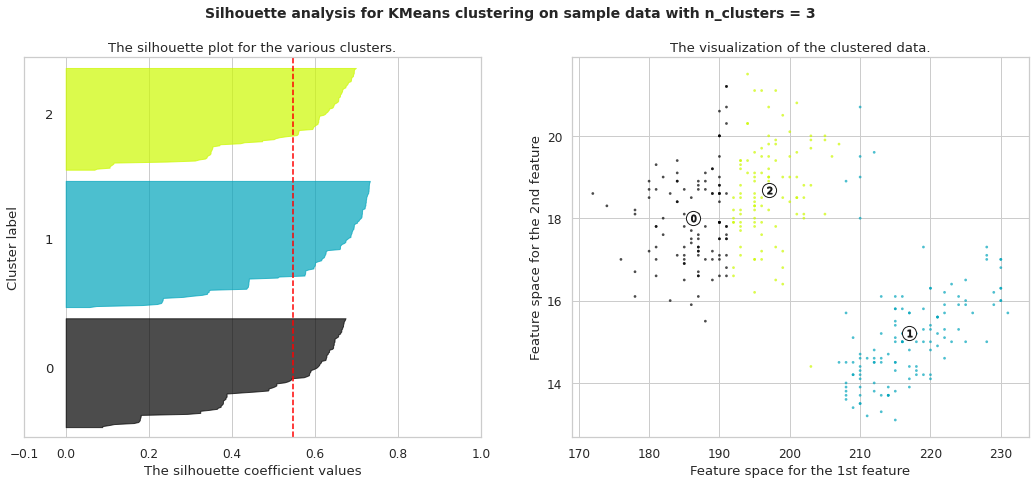

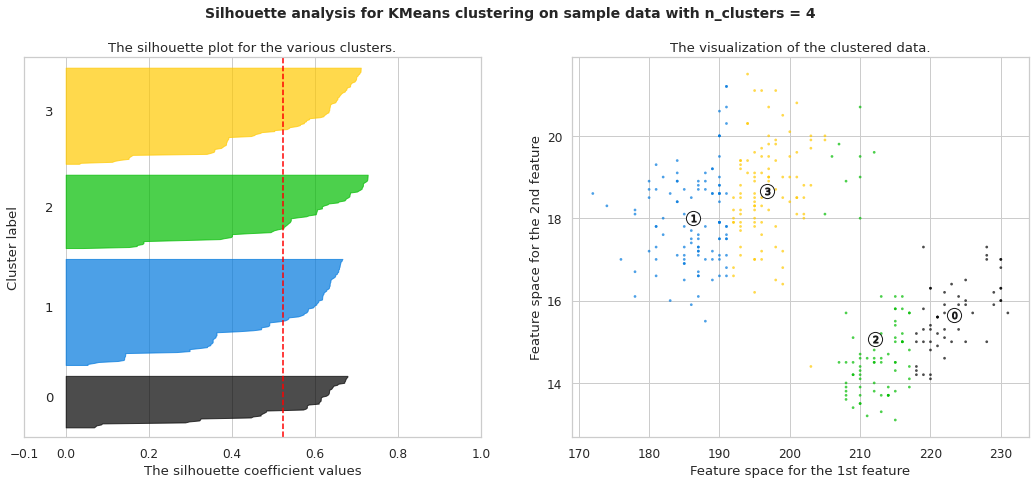

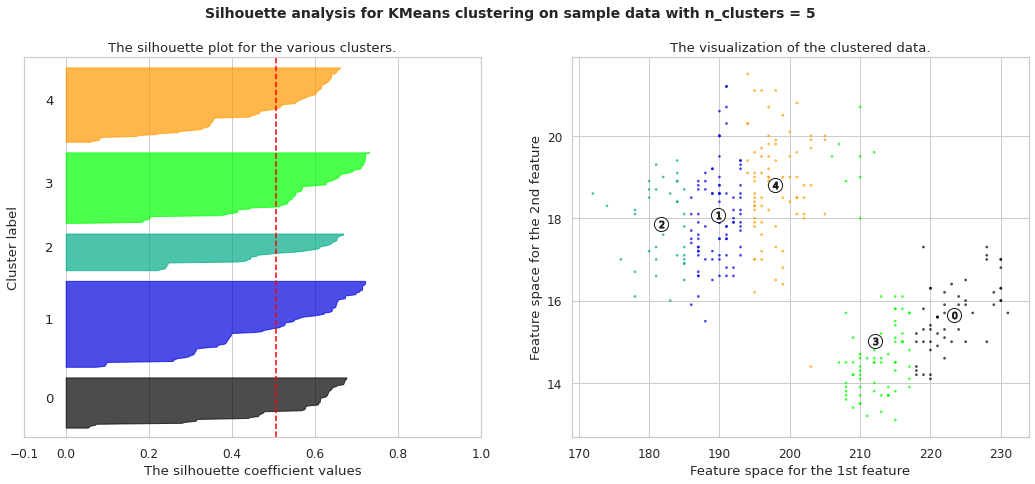

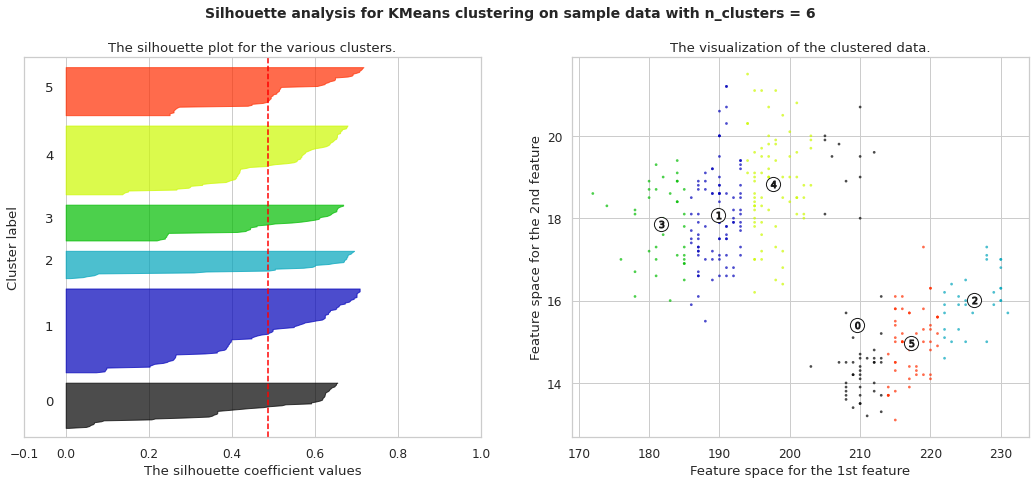

In [143]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["flipper_length_mm", "culmen_depth_mm"]].values
y = df['species'].values

range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


### Hierarchical Clustering

[Hierarchichal Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. ([Read more...](https://en.wikipedia.org/wiki/Hierarchical_clustering))


In [144]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
#model.fit(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g' ]])
model.fit(df[['flipper_length_mm', 'culmen_depth_mm']])
labels = model.labels_
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean"))

Silhouette Coefficient: 0.569


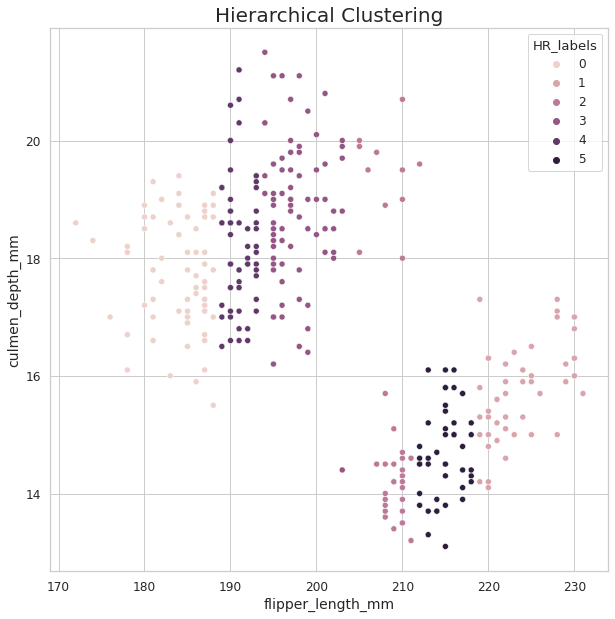

In [146]:
df['HR_labels']=model.labels_
# Plotting resulting clusters
plt.figure(figsize=(10,10))
sns.scatterplot(df['flipper_length_mm'],df['culmen_depth_mm'],hue=df['HR_labels'])
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('flipper_length_mm',fontsize=14)
plt.ylabel('culmen_depth_mm',fontsize=14)
plt.show()


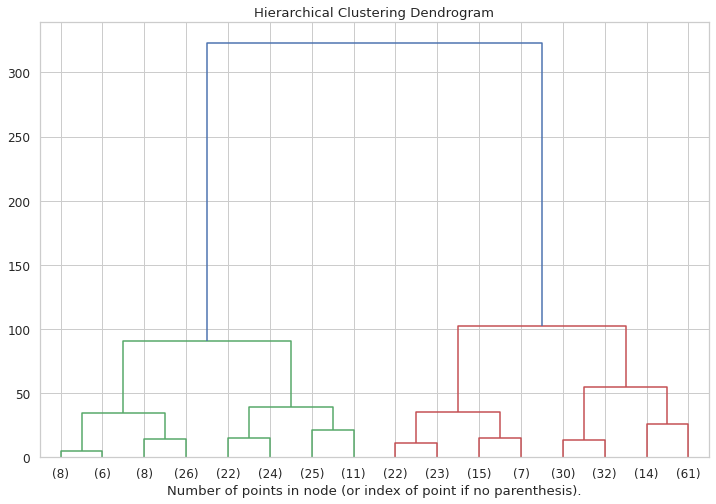

In [147]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["flipper_length_mm", "culmen_depth_mm"]].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(12,8))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [149]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(X)
label = ward.labels_
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, label, metric="sqeuclidean"))



Silhouette Coefficient: 0.848


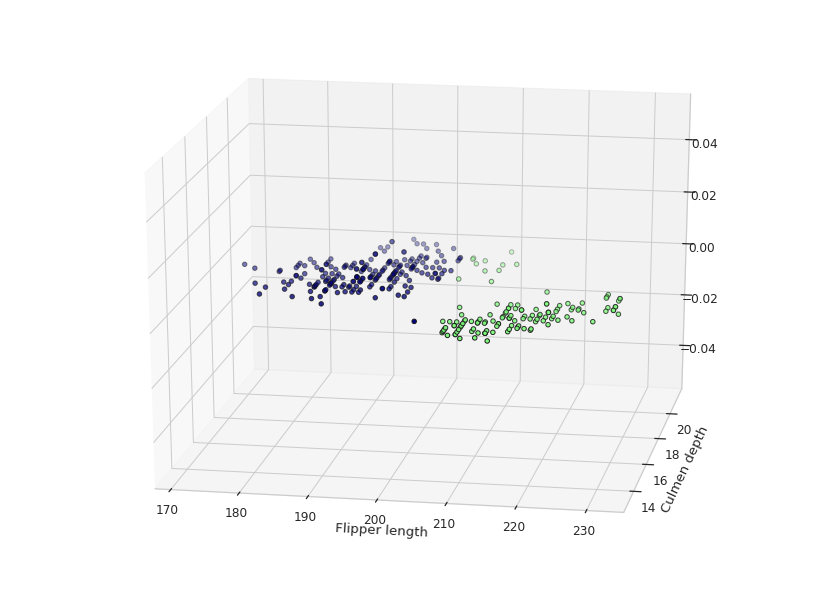

In [151]:
fig1 = plt.figure(figsize=(12,8))

ax1 = fig1.add_subplot(111, projection="3d", elev=20, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
ax1.set_xlabel("Flipper length")
ax1.set_ylabel("Culmen depth")
ax1.set_zlabel(" ")

for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
     #   X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )


### DBSCAN

The [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. ([Read more...](https://en.wikipedia.org/wiki/DBSCAN))

The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). 

There are two parameters to the algorithm, _min_samples_ and _eps_, which define formally what we mean when we say dense. Higher _min_samples_ or lower _eps_ indicate higher density necessary to form a cluster. 


In [152]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


dbscan=DBSCAN(eps=0.5,min_samples=30)
#dbscan.fit(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']])
dbscan.fit(df[['flipper_length_mm', 'culmen_depth_mm']])


DBSCAN(min_samples=30)

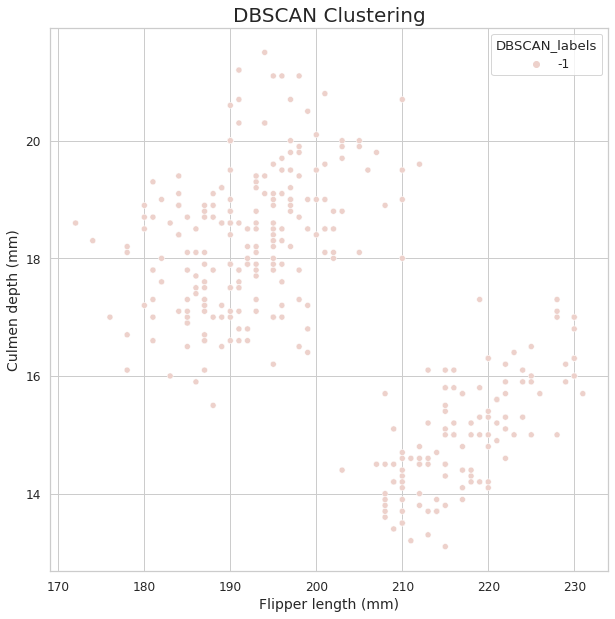

In [154]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
colors=['purple','red','blue','green']
sns.scatterplot(df['flipper_length_mm'],df['culmen_depth_mm'],hue=df['DBSCAN_labels'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Flipper length (mm)',fontsize=14)
plt.ylabel('Culmen depth (mm)',fontsize=14)
plt.show()

#print(
#    "Silhouette Coefficient: %0.3f"
#    % metrics.silhouette_score(X, dbscan.labels_, metric="sqeuclidean"))



In [155]:
#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["flipper_length_mm", "culmen_depth_mm"]].values
X = StandardScaler().fit_transform(X)


In [156]:
X.shape

(334, 2)

In [157]:
db = DBSCAN(eps=0.5, min_samples=30).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, db.labels_))


Estimated number of clusters: 2
Estimated number of noise points: 24
Silhouette Coefficient: 0.518


In [116]:
len(set(labels))

3

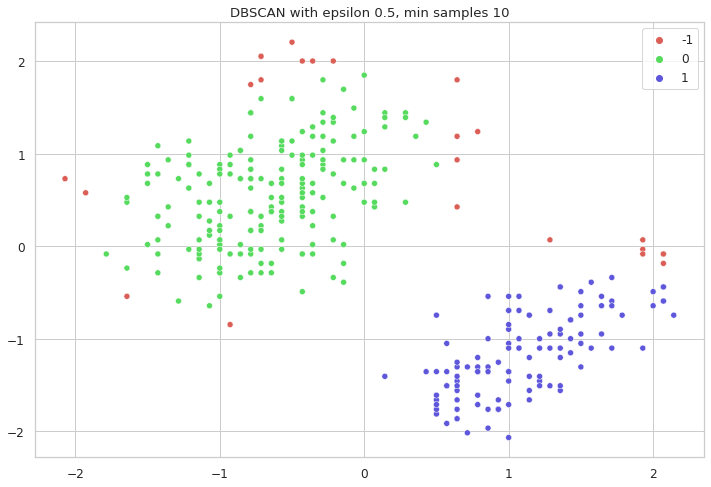

In [158]:

plt.figure(figsize=(12, 8))
sns.scatterplot(X[:,0], X[:,1], hue=labels, 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 0.5, min samples 10')
plt.show()


### OPTICS
The [OPTICS Algorithm](
https://scikit-learn.org/stable/modules/clustering.html#optics) shares many similarities with the DBSCAN algorithm, and can be considered a generalization of DBSCAN that relaxes the eps requirement from a single value to a value range. The key difference between DBSCAN and OPTICS is that the OPTICS algorithm builds a reachability graph, which assigns each sample both a reachability_ distance, and a spot within the cluster ordering_ attribute; these two attributes are assigned when the model is fitted, and are used to determine cluster membership. ([Read more...](https://en.wikipedia.org/wiki/OPTICS_algorithm))


In [159]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np


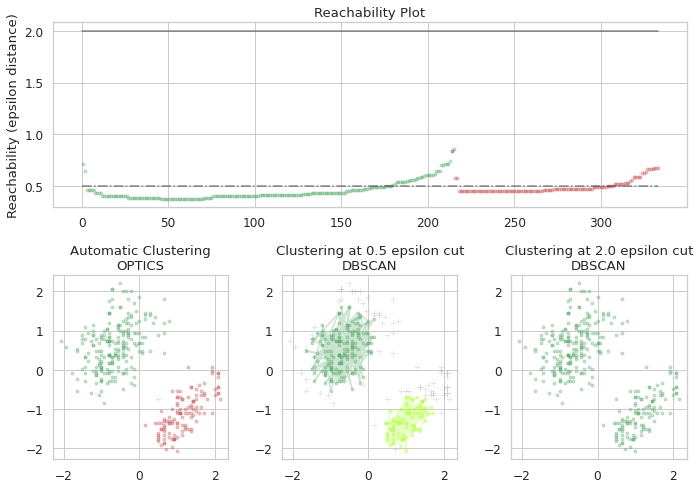

In [160]:

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)


#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["flipper_length_mm", "culmen_depth_mm"]].values
X = StandardScaler().fit_transform(X)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()


### Mean Shift

The [Mean Shift Clustering Algorithm](https://scikit-learn.org/stable/modules/clustering.html#mean-shift) aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids. ([Read more...](https://en.wikipedia.org/wiki/Mean_shift))

In [123]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["flipper_length_mm", "culmen_depth_mm"]].values
X = StandardScaler().fit_transform(X)


In [124]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=300)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 2


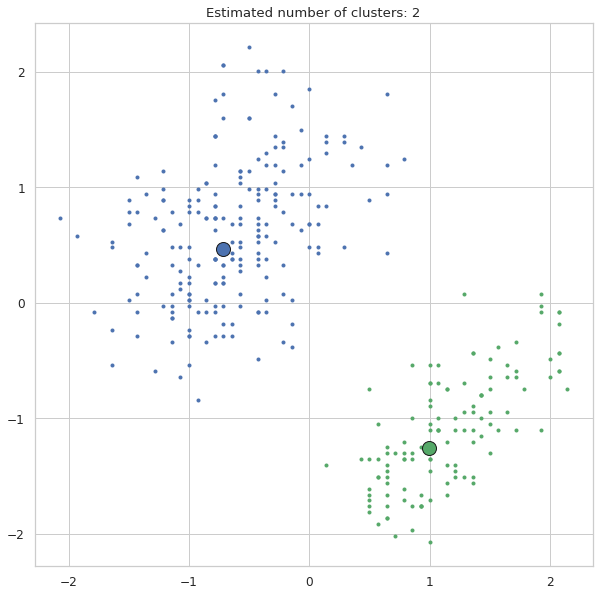

In [125]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


### BIRCH

BIRCH (balanced iterative reducing and clustering using hierarchies) is an unsupervised data mining algorithm used to perform hierarchical clustering over particularly large data-sets.

The [BIRCH Algorithm](https://scikit-learn.org/stable/modules/clustering.html#birch) builds a tree called the Clustering Feature Tree (CFT) for the given data. The data is essentially lossy compressed to a set of Clustering Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Clustering Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children. ([Read more...](https://en.wikipedia.org/wiki/BIRCH))






BIRCH without global clustering as the final step took 0.03 seconds
n_clusters : 23
BIRCH with global clustering as the final step took 0.03 seconds
n_clusters : 8
Time taken to run MiniBatchKMeans 1.28 seconds


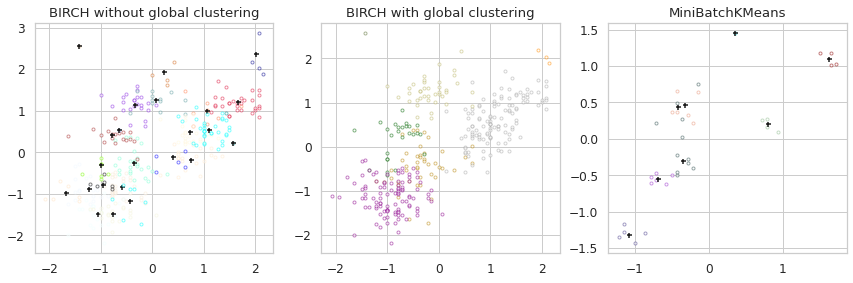

In [129]:
# Authors: Manoj Kumar <manojkumarsivaraj334@gmail.com
#          Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
# License: BSD 3 clause

from joblib import cpu_count
from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.datasets import make_blobs


#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["flipper_length_mm", "culmen_length_mm", "body_mass_g"]].values
y = df["culmen_depth_mm"].values.reshape(-1, 1)
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)

# Generate centers for the blobs so that it forms a 10 X 10 grid.
#xx = np.linspace(-20, 20, 10)
#yy = np.linspace(-10, 10, 10)
#xx, yy = np.meshgrid(xx, yy)
#n_centers = np.hstack((np.ravel(xx)[:, np.newaxis], np.ravel(yy)[:, np.newaxis]))

# Generate blobs to do a comparison between MiniBatchKMeans and BIRCH.
#X, y = make_blobs(n_samples=25000, centers=n_centers, random_state=0)

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with BIRCH with and without the final clustering step
# and plot.
birch_models = [
    Birch(threshold=0.5, n_clusters=None),
    Birch(threshold=0.5, n_clusters=8),
]
final_step = ["without global clustering", "with global clustering"]

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    print("BIRCH %s as the final step took %0.2f seconds" % (info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1], c="w", edgecolor=col, marker=".", alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
    #ax.set_ylim([-25, 25])
    #ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title("BIRCH %s" % info)

# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=100,
    batch_size=256 * cpu_count(),
    n_init=10,
    max_no_improvement=10,
    verbose=0,
    random_state=0,
)
t0 = time()
mbk.fit(X)
t_mini_batch = time() - t0
print("Time taken to run MiniBatchKMeans %0.2f seconds" % t_mini_batch)
mbk_means_labels_unique = np.unique(mbk.labels_)

ax = fig.add_subplot(1, 3, 3)
for this_centroid, k, col in zip(mbk.cluster_centers_, range(n_clusters), colors_):
    mask = mbk.labels_ == k
    ax.scatter(X[mask, 0], X[mask, 1], marker=".", c="w", edgecolor=col, alpha=0.5)
    ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
#ax.set_xlim([-25, 25])
#ax.set_ylim([-25, 25])
ax.set_title("MiniBatchKMeans")
ax.set_autoscaley_on(False)
plt.show()


In [130]:
from sklearn.cluster import Birch
#X = [[0, 1], [0.3, 1], [-0.3, 1], [0, -1], [0.3, -1], [-0.3, -1]]

X = df[["flipper_length_mm", "culmen_depth_mm"]].values
#y = df["flipper_length_mm"].values.reshape(-1, 1)
X = StandardScaler().fit_transform(X)
#y = StandardScaler().fit_transform(y)

brc = Birch(n_clusters=3)
brc.fit(X)
Birch(n_clusters=3)
brc.predict(X)
#array([0, 0, 0, 1, 1, 1])

array([1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


In [134]:
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(
#    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
#)

centers = [[0, 0], [0, 0], [0, 0]]
#X = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].values
X = df[["flipper_length_mm", "culmen_depth_mm", "culmen_length_mm"]].values
X = StandardScaler().fit_transform(X)


af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print(
#    "Adjusted Mutual Information: %0.3f"
#    % metrics.adjusted_mutual_info_score(labels_true, labels)
#)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)


Estimated number of clusters: 3
Silhouette Coefficient: 0.699


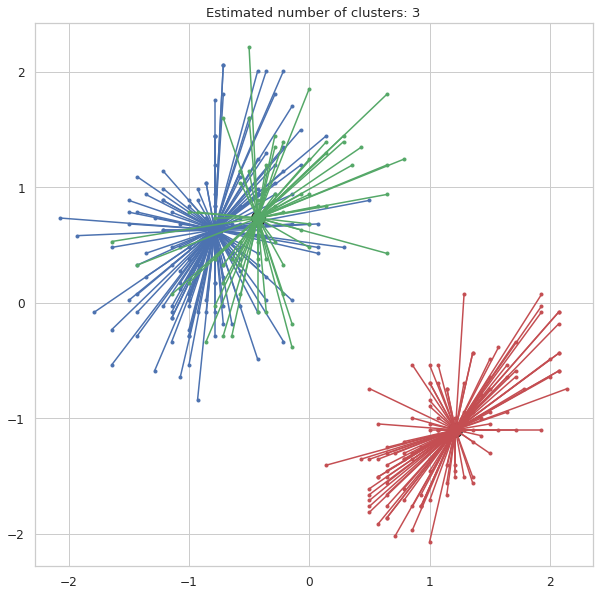

In [135]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close("all")
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


### Putting it altogether...



NameError: ignored

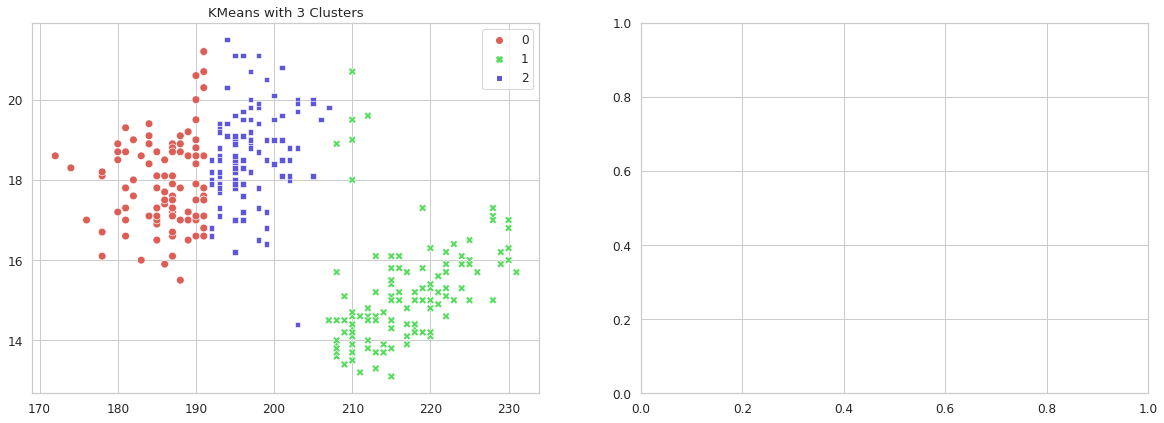

In [141]:
X = df[["flipper_length_mm", "culmen_depth_mm"]].values

fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=3).fit(X)
#X['Labels'] = km5.labels_
sns.scatterplot(X[:,0], X[:,1], hue=km5.labels_, style=km5.labels_,
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('KMeans with 3 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
#X['Labels'] = agglom.labels_
sns.scatterplot(X[:,0], X[:,1], hue=agglom.labels_, style=agglom.labels_,
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=0.5, min_samples=30).fit(X)
#X['Labels'] = db.labels_
sns.scatterplot(X[:,0], X[:,1], hue=db.labels_, style=db.labels_, s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 0.5, min samples 10')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)
#X['Labels'] = ms.labels_
sns.scatterplot(X[:,0], X[:,1], hue=ms.labels_, style=ms.labels_, s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()


In [ ]:
X.shape

(334, 4)